## Word2Vec

In [2]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### 1. Importamos el dataset

In [3]:
from datasets  import load_dataset
ds = load_dataset("huggingartists/metallica")

In [4]:
MetallicA=ds['train']['text']
MetallicA[5]

'Life, it seems, will fade away\nDrifting further every day\nGetting lost within myself\nNothing matters, no one else\nI have lost the will to live\nSimply nothing more to give\nThere is nothing more for me\nNeed the end to set me free\nThings not what they used to be\nMissing one inside of me\nDeathly lost, this cant be real\nCannot stand this hell I feel\nEmptiness is filling me\nTo the point of agony\nGrowing darkness taking dawn\nI was me, but now hes gone\nNo one but me can save myself, but its too late\nNow I cant think, think why I should even try\nYesterday seems as though it never existed\nDeath greets me warm, now I will just say goodbye\nGoodbye'

#### 2. Limpiamos el dataset

In [65]:
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

MetallicA2 = [token.replace("\n", " ") for token in MetallicA]
MetallicA2 = [word.lower() for word in MetallicA2]
MetallicA2 = [re.sub(r'[^\w\s]', '', cancion) for cancion in MetallicA2]
stop_words = set(stopwords.words('english'))

MetallicA2 = [
    " ".join(word for word in cancion.split() if word not in stop_words)
    for cancion in MetallicA2
]

print(MetallicA2[0])

close matter far couldnt much heart forever trusting nothing else matters never opened way life live way words dont say nothing else matters trust seek find everyday us something new open mind different view nothing else matters never cared never cared know know close matter far couldnt much heart forever trusting nothing else matters never cared never cared know know never opened way life live way words dont say nothing else matters trust seek find everyday us something new open mind different view nothing else matters never cared say never cared games play never cared never cared know know yeahyeah close matter far couldnt much heart forever trusting nothing else matters


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 3. Construimos el embedding

In [95]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=MetallicA2, vector_size=100, window=5, min_count=1, workers=4) 
# min cpiunt es la frecuencia minima de palabra, qindows tiene que ver con el contecto, vectos size el el numero d eelementos del vxtor

In [96]:
len(MetallicA2)

469

#### 3.1 Creamos un diccionario de tituos de ls canciones.

Creo un diccionario de titulos de canciones. Como no tengo lso titulos me quedo con las 18 primeras palabras cada cancion

In [97]:
Metallica_titles=[]
i=0
for i, cancion in enumerate(MetallicA2):
    Metallica_titles.append(cancion[:18])  
Metallica_titles

['close matter far c',
 'cant remember anyt',
 'say prayers little',
 'end passion play c',
 'new blood joins ea',
 'life seems fade aw',
 'make fight hill ea',
 'hey im life im one',
 'slaves hebrews bor',
 'welcome time stand',
 'lashing action ret',
 'road becomes bride',
 'halls justice pain',
 'lay beside tell th',
 'blackened end wint',
 'last breath fourth',
 'guilty charged dam',
 'bitterness burden ',
 'long lonesome high',
 'alright scanning s',
 'could know new daw',
 'dear mother dear f',
 'give fuel give fir',
 'born push round be',
 'bodies fill fields',
 'saint anger round ',
 'man lies murders p',
 'late night systems',
 'name desperation n',
 'life suffocates pl',
 'going cork kerry m',
 'dont tread said do',
 'messenger fear sig',
 'see see truth offe',
 '',
 'take pain mine run',
 'blacked pop queen ',
 'one two one two th',
 'wish may wish migh',
 'darkness falls may',
 'feels right time c',
 'mama taught well t',
 'come unto feel per',
 'dealing agony with',
 'prid

#### 3.2 construimos los vectores

In [98]:
# Obtener los vectores de cada canción (promediando los embeddings de sus palabras)
cancion_vectors = []
i=0

cancion_vectors = []
for i, cancion in enumerate(MetallicA2):
    vectors = [model.wv[word] for word in cancion if word in model.wv] # model es mi modelo word2vec
    if vectors:
        cancion_vectors.append((Metallica_titles[i], np.mean(vectors, axis=0)))

# Acceder al embedding de una canción específica
for titulo, vector in cancion_vectors:
    print(f"{titulo}: {vector[:25]}")  # Mostrar solo primeras dimensiones




close matter far c: [-0.22263008 -0.04663734 -0.03803178 -0.05116161  0.08030826  0.18749188
 -0.06904069 -0.08612856 -0.2616268   0.10271004 -0.11793091  0.07955465
 -0.03648367 -0.18311182  0.08578968 -0.05277633  0.0862205   0.30819392
 -0.13001567 -0.31868097 -0.17988598 -0.18753622  0.33187744  0.01742335
 -0.00197145]
cant remember anyt: [-0.18983068 -0.08431546 -0.06742625 -0.05309895  0.05733826  0.20850521
 -0.08727219 -0.10431098 -0.26865494  0.11521698 -0.11492816  0.09531668
 -0.03086379 -0.17034009  0.06560075 -0.02972314  0.10958828  0.30680168
 -0.12857519 -0.32153502 -0.17813765 -0.1896898   0.30815318  0.00154912
  0.01434752]
say prayers little: [-0.22257486 -0.04750875 -0.04759035 -0.07883584  0.06644329  0.19689679
 -0.06824376 -0.09207304 -0.25778094  0.10524742 -0.12567726  0.09279097
 -0.03607229 -0.19602962  0.08238332 -0.07980639  0.09317484  0.3081482
 -0.14153907 -0.3326911  -0.19826195 -0.19325288  0.334338    0.03010081
 -0.01231112]
end passion play c: [-0

#### 4. Buscamos canciones similares

In [123]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

# Lista de tuplas: (nombre de la canción, vector)


# Normalizar los vectores de las canciones
#vectors_norm = normalize(np.array([vec for _, vec in cancion_vectors]))

# Extraer solo los vectores de las canciones
vectors = np.array([vec for _, vec in cancion_vectors])
# lo he normalizado porwqur salian muy parecidas todas las canciones. al parecer estan en una misma zona del espacio vectorial
scaler = StandardScaler()
vectors_norm = scaler.fit_transform(vectors)

# Calcular la matriz de similitud del coseno
cosine_sim = cosine_similarity(vectors_norm)

# Mostrar la matriz de similitud
print("Matriz de similitud del coseno entre canciones:")
print(cosine_sim)

# Calcular la matriz de correlación de Pearson
pearson_corr = np.corrcoef(vectors)

# Crear DataFrame con los títulos de las canciones
df_corr_pearson = pd.DataFrame(pearson_corr, index=titulos, columns=titulos)

# Mostrar las primeras filas
print(df_corr_pearson.head())


Matriz de similitud del coseno entre canciones:
[[ 0.9999999  -0.53549045  0.701413   ...  0.50528216 -0.18417907
  -0.03524441]
 [-0.53549045  0.99999976 -0.47034928 ... -0.35248983  0.528943
   0.22390136]
 [ 0.701413   -0.47034928  1.0000002  ...  0.31963715 -0.13082969
  -0.24102023]
 ...
 [ 0.50528216 -0.35248983  0.31963715 ...  1.0000004  -0.3617621
   0.21633105]
 [-0.18417907  0.528943   -0.13082969 ... -0.3617621   0.99999994
  -0.20456575]
 [-0.03524441  0.22390136 -0.24102023 ...  0.21633105 -0.20456575
   0.99999994]]
                    close matter far c  cant remember anyt  \
close matter far c            1.000000            0.995041   
cant remember anyt            0.995041            1.000000   
say prayers little            0.998369            0.995301   
end passion play c            0.994826            0.997715   
new blood joins ea            0.996631            0.986554   

                    say prayers little  end passion play c  \
close matter far c          

Convierte en df la matriz de similaridas del coseno

In [124]:
import pandas as pd

# Extraer los títulos de las canciones
titulos = [titulo for titulo, _ in cancion_vectors]

# Crear un DataFrame con la matriz de similitud y los títulos
df_similitud = pd.DataFrame(cosine_sim, index=titulos, columns=titulos)

# Mostrar las primeras filas de la matriz
print(df_similitud.head())


                    close matter far c  cant remember anyt  \
close matter far c            1.000000           -0.535490   
cant remember anyt           -0.535490            1.000000   
say prayers little            0.701413           -0.470349   
end passion play c           -0.062374            0.333397   
new blood joins ea            0.906096           -0.516376   

                    say prayers little  end passion play c  \
close matter far c            0.701413           -0.062374   
cant remember anyt           -0.470349            0.333397   
say prayers little            1.000000           -0.492174   
end passion play c           -0.492174            1.000000   
new blood joins ea            0.827204           -0.229604   

                    new blood joins ea  life seems fade aw  \
close matter far c            0.906096            0.288189   
cant remember anyt           -0.516376           -0.331461   
say prayers little            0.827204            0.698827   
end pa

#### 4. Exploracion de los resultados

#### 4.1 Camciones similares dentro de un rango determinado

In [107]:
# Seleccionar pares de canciones con similitud en el rango deseado
canciones_similares = []

for i in range(len(titulos)):
    for j in range(i + 1, len(titulos)):  # Para evitar comparaciones duplicadas
        similitud = df_similitud.iloc[i, j]
        if 0.8 <= similitud <= 0.9:
            canciones_similares.append((titulos[i], titulos[j], similitud))

# Mostrar resultados
print("Canciones con similitud entre 0.8 y 0.9:")
for c1, c2, sim in canciones_similares:
    print(f"{c1} ↔ {c2} (Similitud: {sim:.4f})")


Canciones con similitud entre 0.8 y 0.9:
close matter far c ↔ darkness falls may (Similitud: 0.8612)
close matter far c ↔ little grave im gr (Similitud: 0.8479)
close matter far c ↔ devil waiting outs (Similitud: 0.8287)
close matter far c ↔ last breath fourth (Similitud: 0.8401)
cant remember anyt ↔ make fight hill ea (Similitud: 0.8267)
cant remember anyt ↔ make fight hill ea (Similitud: 0.8178)
cant remember anyt ↔ im built like dres (Similitud: 0.8345)
cant remember anyt ↔ oioioioioi make fi (Similitud: 0.8338)
cant remember anyt ↔ like siren head em (Similitud: 0.8300)
cant remember anyt ↔ make fight hill ea (Similitud: 0.8412)
cant remember anyt ↔ make fight hill ea (Similitud: 0.8315)
cant remember anyt ↔ make fight hill ea (Similitud: 0.8178)
cant remember anyt ↔ dallas guys arms t (Similitud: 0.8369)
say prayers little ↔ new blood joins ea (Similitud: 0.8272)
say prayers little ↔ new blood joins ea (Similitud: 0.8304)
say prayers little ↔ hi folks good even (Similitud: 0.8971)

#### 4.2 Como distribuyen los coeficioentes de similaridad

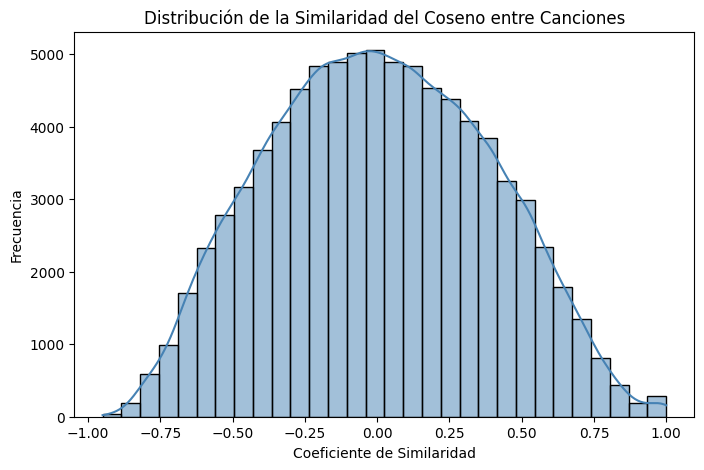

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer los coeficientes de similitud SIN la diagonal (que siempre es 1)
similaridades = cosine_sim[np.triu_indices(len(cosine_sim), k=1)]

# Graficar distribución con Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(similaridades, bins=30, kde=True, color="steelblue")

# Etiquetas
plt.xlabel("Coeficiente de Similaridad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Similaridad del Coseno entre Canciones")

plt.show()


#### 4.3 Scatterplot de las canciones

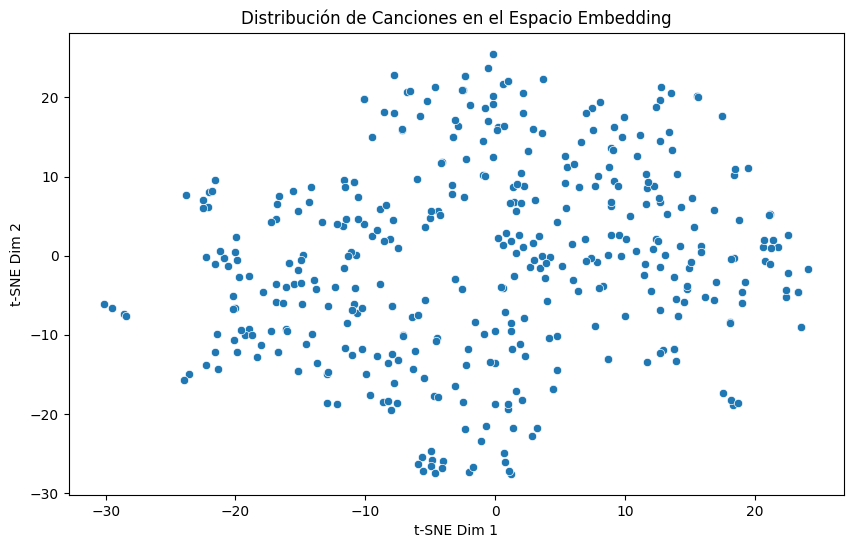

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Convertir los embeddings en matriz NumPy
vectors = np.array([vec for _, vec in cancion_vectors])

# Reducir dimensiones con t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_tsne = tsne.fit_transform(vectors)

# Extraer los títulos
titulos = [titulo for titulo, _ in cancion_vectors]

# Graficar con Matplotlib
plt.figure(figsize=(10, 6))
sns.scatterplot(x=embeddings_tsne[:, 0], y=embeddings_tsne[:, 1])

# Etiquetar cada punto con su título
#for i, titulo in enumerate(titulos):
#    plt.text(embeddings_tsne[i, 0], embeddings_tsne[i, 1], titulo, fontsize=8)

plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.title("Distribución de Canciones en el Espacio Embedding")
plt.show()


#### 4.4 Scatterplot dinámico con Plotly

In [117]:
import plotly.io as pio
pio.renderers.default = "notebook"

In [ ]:
#pio.renderers.default = "browser"  # para VS Code Abre el gráfico en el navegador

In [122]:
import plotly.express as px
import pandas as pd

# Crear DataFrame con coordenadas y títulos
df_tsne = pd.DataFrame({
    "x": embeddings_tsne[:, 0],
    "y": embeddings_tsne[:, 1],
    "Canción": titulos  # Se usará en hover
})

# Generar gráfico interactivo con hover_name
fig = px.scatter(df_tsne, x="x", y="y", hover_name="Canción",
                 title="Distribución de Canciones de MetallicA (t-SNE)",
                 labels={"x": "Dimensión 1", "y": "Dimensión 2"})

fig.update_traces(marker=dict(size=8, color="steelblue"))
fig.show()
